In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

In [2]:
def remove_zero_row(df, row_name):
    """
    Remove the whole row when there is a '0' value 
    in the specified row name
    """
    return df[df[row_name] != 0]


def get_mean_genre_by_mos(df, genre):
    """
    Gets the mean of the dataset
    by grouping it with month and 'genre'
    """
    return df.groupby(['month', genre], as_index=False).mean()
    # loc[1] is meant to get the value only for boolean "True" dataset

def plot_data(df, data_view, genre_plot):
    plt.figure(figsize=(10,8))
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1)
    sns.barplot(x='month', 
                y=data_view, 
                hue=genre_plot, 
                data=df.sort_values(['month', genre_plot]),
                order=["Jan", "Feb", "Mar", "Apr",
                         "May", "Jun", "Jul", "Aug",
                         "Sep", "Oct", "Nov", "Dec"
                        ]
                )
    plt.xlabel("Month")
    plt.ylabel("Mean {}".format(data_view.title()))
    plt.title("Mean {} of {} Movies".format(data_view.title(),
                                            genre_plot.title()))
    plt.show()
    return

In [3]:
movie_data_df = pd.read_csv('tmdb-movies.csv', header=0)
# import data and use row 0 as index

In [4]:
new_moviedb_df =  movie_data_df.join(movie_data_df.pop('genres').str.get_dummies())
# split the genres column to separate columns for ease of data corelation
# source: https://stackoverflow.com/questions/47248727/parsing-csv-file-with-pandas-in-python3

In [5]:
new_moviedb_df.iloc[:, 20 : 42] = new_moviedb_df.iloc[:, 20 : 42].applymap(lambda x: True 
                                                                           if x == 1 
                                                                           else x).applymap(lambda x: False 
                                                                                            if x== 0 
                                                                                            else x)
# Genre location/index has been hardcoded by in future I hope to get this automated thru a variable
# Convert 0 and 1 to Boolean for the Genre field
# https://stackoverflow.com/questions/38499747/converting-all-occurrence-of-true-false-to-1-0-in-a-dataframe-with-mixed-datatyp

In [6]:
new_moviedb_df['month'] = pd.DatetimeIndex(new_moviedb_df['release_date']).month
# Adds a series on the current dataframe by converting the release date to Month of Release

In [7]:
import calendar
new_moviedb_df['month'] = new_moviedb_df['month'].apply(lambda x: calendar.month_abbr[x])
# Converts Month numeric to String equivalent
# https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name

In [8]:
nonzero_revenue_moviedb_df = remove_zero_row(new_moviedb_df, 'revenue')
# Calls the function to remove dataset that have 0 as values for 'revenue'

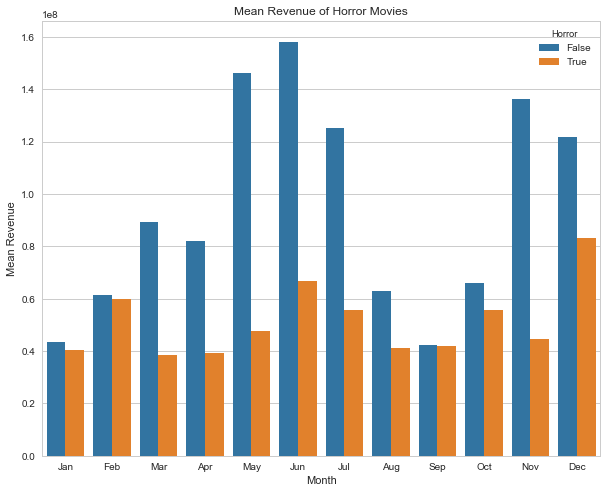

In [61]:
display(HTML("<header><center><h1>Movie Analysis Project</h1></center></header>"))
display(HTML("<header><h3>Is movie earning affected by genre release on relevent season/month of release?</h3></header>"))
display(HTML("<section>- Revenue</section>"))
display(HTML("<section>- Popularity</section>"))
display(HTML("<section>- Average Vote</section>"))
display(HTML("<article>One would think that horror or thriller movies would be popular during holloween period. In this analysis we will look if a month release of a certain genre like horror will have impact if release udring relevant season/month.</article>"))
display(HTML("<article>The figure below shows the mean average of revenue for a horror movie has been group release month. This is compared to movies with other genres."))
horror_mean_moviedb_df = get_mean_genre_by_mos(nonzero_revenue_moviedb_df, 'Horror')
plot_data(horror_mean_moviedb_df, 'revenue', 'Horror')

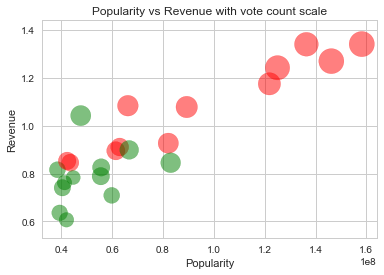

In [55]:

scaler = (horror_mean_moviedb_df['vote_count'])
plt.scatter(horror_mean_moviedb_df['revenue'], 
            horror_mean_moviedb_df['popularity'], 
            s=scaler, 
            color=['r', 'g'], alpha=0.5
           )

# plt.legend(movie_type, loc=2)
plt.title("Popularity vs Revenue with vote count scale")
plt.xlabel("Popularity")
plt.ylabel("Revenue")

plt.show()